# Software Coaching for Python
# Week 5: Document Clustering & Topic Modeling

Instructor: Kang-Pyo Lee 

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "ESK"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Install packages

In [2]:
! pip install --user scikit-learn pyldavis

     |████████████████████████████████| 1.7MB 9.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 37.2MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=64e3863e84064d23f7f9980261dd300ee5a667a5882464138f1d6480baaf246b
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.


## What Is a Corpus?

A corpus or text corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Text Corpus: https://en.wikipedia.org/wiki/Text_corpus

In [2]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

This corpus contains four documents and nine unique words, or terms. 

## What Is a Document-Term Matrix?

A document-term matrix (DTM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take.

Document-term matrix: https://en.wikipedia.org/wiki/Document-term_matrix

DTM is based on the "Bag-of-Words" model, where a text is simply represented as the bag of its words, disregarding grammar and even word order but only keeping multiplicity. 
- Pros: Simple and easy to analyze.
- Cons: Grammar and order are lost.

Bag-of-words model: https://en.wikipedia.org/wiki/Bag-of-words_model

## What Is TF-IDF?

Term frequency (TF) is the number of times a term occurs in a document. Adjustments are often made to simple term frequency in the case where the lengh of documents varies greatly. In that case, we typically divide the raw term frequencies by the length of the document, i.e., the number of all terms in the document. 

Inverse document frequency (IDF) is an inverse function of the number of documents in which it occurs. For example, because the term *the* is so common in English, term frequency will tend to incorrectly emphasize documents which happen to use the word *the* more frequently, without giving enough weight to the more meaningful terms. Here, the term *the* is not a good keyword to distinguish relevant and non-relevant documents and terms. Hence, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

The TF-IDF is the product of two statistics, term frequency and inverse document frequency. There are various ways for determining the exact values of both statistics.

tf–idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Building a DTM with Term Frequencies

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vectorizer = TfidfVectorizer(use_idf=False, norm=None)

sklearn.feature_extraction.text.TfidfVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- `lowercase` (bool, default=True): Convert all characters to lowercase before tokenizing.

In [5]:
X = vectorizer.fit_transform(corpus)

sklearn.feature_extraction.text.TfidfVectorizer.fit_transform: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform

From this point on, you can consider X the document-term matrix for `corpus`. 

In [6]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [7]:
type(X)

scipy.sparse.csr.csr_matrix

In [8]:
X.shape

(4, 9)

X has four rows, or documents, and nine columns, or terms.

In [9]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names

In [10]:
X.toarray()

array([[0., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 2., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0., 1.]])

In [11]:
import pandas as pd

pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,and,document,first,is,one,second,the,third,this
doc0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
doc1,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
doc2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
doc3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


This document-term matrix is based on the bag-of-words model, so we have lost all the grammar and order of words. Only how many times each term occurs matters in this scheme.  

## Building a DTM with Binary Term Frequencies

In [12]:
vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)
X = vectorizer.fit_transform(corpus)

- `binary` (bool, default=False): If True, all non-zero term counts are set to 1.

In [13]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,and,document,first,is,one,second,the,third,this
doc0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
doc1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
doc2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
doc3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Whether or not each word appears in a document only matters, no matter how many times it appears.

## Building a DTM with Normalized Term Frequencies

It would be unfair to give more credit to longer documents with more terms. Normalization is used to get rid of the advantage of longer documents with possibly more terms. 

In [14]:
vectorizer = TfidfVectorizer(use_idf=False, norm="l2")
X = vectorizer.fit_transform(corpus)

- `norm` ('l1', 'l2' or None, optional, default='l2') 
    - 'l2': Sum of squares of vector elements is 1
    - 'l1': Sum of absolute values of vector elements is 1

In [15]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,and,document,first,is,one,second,the,third,this
doc0,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214
doc1,0.000000,0.707107,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.353553
doc2,0.408248,0.000000,0.000000,0.408248,0.408248,0.000000,0.408248,0.408248,0.408248
doc3,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214


## Building a DTM with TF-IDF

In [16]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2")
X = vectorizer.fit_transform(corpus)

- `use_idf` (bool, default=True): Enable inverse-document-frequency reweighting.

In [17]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,and,document,first,is,one,second,the,third,this
doc0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
doc1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
doc2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
doc3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## Building a DTM with TF-IDF Removing English Stopwords

You may want no stopwords in English to be included in the DTM. 

In [18]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english")
X = vectorizer.fit_transform(corpus)

- `stop_words` (str {'english'}, list, or None, default=None)

In [19]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,document,second
doc0,1.000000,0.000000
doc1,0.787223,0.616668
doc2,0.000000,0.000000
doc3,1.000000,0.000000


By removing English stopwords, the terms <i>and</i>, <i>first</i>, <i>is</i>, <i>one</i>, <i>the</i>, <i>third</i>, and <i>this</i> have disappeared in the DTM. 

## Building a DTM with TF-IDF Removing Corpus-Specific Stopwords

While there are universal stopwords, there could be corpus-specific stopwords, which occur many times in a specific corpus. 

In [20]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", max_df=0.7)
X = vectorizer.fit_transform(corpus)

- `max_df` (float in range [0.0, 1.0] or int, default=1.0): When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold. For example, if `max_df` is set to 0.7, all terms that appear in over 70% of the documents will be excluded.  

In [21]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

,and,first,one,second,third
doc0,0.00000,1.0,0.00000,0.0,0.00000
doc1,0.00000,0.0,0.00000,1.0,0.00000
doc2,0.57735,0.0,0.57735,0.0,0.57735
doc3,0.00000,1.0,0.00000,0.0,0.00000


By removing corpus-specific stopwords, the terms <i>document</i>, <i>is</i>, <i>the</i>, and <i>this</i> have disappeared in the DTM. 

#### The choice of which scheme to fill the document-term matrix depends on the data. 

## Loading Data

In [22]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{outcome_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime
0,ump-leaves-the-white-house-today-more-unpopular-than-ever.html,"Trump Leaves The White House Today, More Unpopular Than Ever",Galen Druke,"Jan. 20, 2021"
1,the-final-two-months-of-trumps-presidency-were-the-most-important-ones.html,The Final Two Months of Trump’s Presidency Were The Most Important Ones,Perry Bacon Jr.,"Jan. 20, 2021"
2,the-spurs-young-trio-has-them-back-in-the-mix.html,The Spurs’ Young Trio Has Them Back In The Mix,Jared Dubin,"Jan. 20, 2021"
3,trump-is-leaving-office-with-a-bunch-of-legal-problems-and-were-not-just-talking-about-impeachment.html,Trump Is Leaving Office With a Bunch of Legal Problems — And We’re Not Just Talking About Impeachment,Amelia Thomson-DeVeaux,"Jan. 20, 2021"
4,e-pandemic-and-the-attack-on-the-capitol-will-likely-define-trumps-presidency.html,The Pandemic And The Attack On The Capitol Will Likely Define Trump’s Presidency,Galen Druke,"Jan. 19, 2021"
...,...,...,...,...
1291,can-the-kansas-city-chiefs-keep-getting-this-lucky.html,Can The Kansas City Chiefs Keep Getting This Lucky?,Ty Schalter,"Jan. 21, 2021"
1292,trump-made-the-federal-courts-whiter-and-more-conservative-and-that-will-be-tough-for-biden-to-reverse.html,"It Will Be Tough For Biden To Reverse Trump’s Legacy Of A Whiter, More Conservative Judiciary",Elena Mejía,"Jan. 21, 2021"
1293,bidens-team-and-priorities-show-how-the-democratic-party-changed-in-the-trump-era.html,Biden’s Team And Priorities Show How The Democratic Party Changed In The Trump Era,Perry Bacon Jr.,"Jan. 21, 2021"
1294,-bidens-vision-of-unity-possible.html,Is Biden’s Vision Of Unity Possible?,Galen Druke,"Jan. 20, 2021"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1296 non-null   object
 1   title      1296 non-null   object
 2   author     1215 non-null   object
 3   datetime   1285 non-null   object
dtypes: object(4)
memory usage: 40.6+ KB


## Setting the Goal

Our goal is to build a <b>clustering</b> model that is able to find clusters of similar tweets. 
- Feature variables: words in tweet texts
- Records          : documents (tweets)

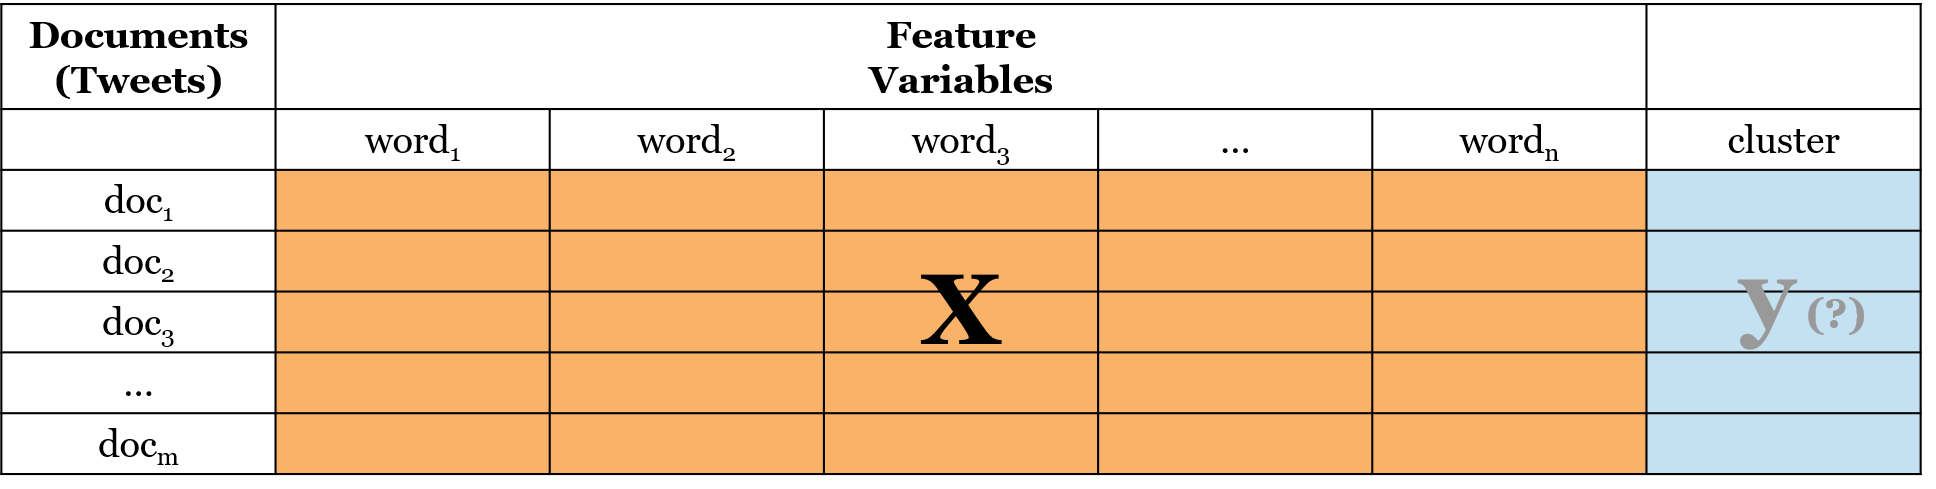

In [24]:
from IPython.display import Image
Image(f"{classdata_folder}/images/clustering.png")

## Preparing Data for Modeling

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.title)

The words in the document-term matrix are used as features of the model and the documents are used as individual records of the model. Recall that there is no `y`, or the outcome variable, in unsupervised learning. Note also that we do not split the dataset into a training set and a test set in unsupervised learning.  

In [26]:
X.shape

(1296, 2598)

There are 1,296 documents, or records, and 2,598 words, or features. 

## K-Means Clustering

### Step 1. Choose the number of clusters

In [27]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

sklearn.cluster.KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Step 3. Fit the model using the input data

In [29]:
%time kmeans.fit(X)

CPU times: user 2.82 s, sys: 2.29 s, total: 5.11 s
Wall time: 2.69 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [30]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00038666, 0.00117771, 0.00232965, ..., 0.0008916 , 0.00044529,
        0.00063799],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00454358, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00461721, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
kmeans.cluster_centers_.shape

(5, 2598)

Each value in the `kmeans.cluster_centers_` array is the coordinates of a centroid in a multi-dimensional space with about 16,500 dimensions. 

In [32]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

In [33]:
df["cluster"] = kmeans.labels_

In [34]:
df[["title", "cluster"]]

,title,cluster
0,"Trump Leaves The White House Today, More Unpopular Than Ever",0
1,The Final Two Months of Trump’s Presidency Were The Most Important Ones,0
2,The Spurs’ Young Trio Has Them Back In The Mix,1
3,Trump Is Leaving Office With a Bunch of Legal Problems — And We’re Not Just Talking About Impeachment,0
4,The Pandemic And The Attack On The Capitol Will Likely Define Trump’s Presidency,0
...,...,...
1291,Can The Kansas City Chiefs Keep Getting This Lucky?,1
1292,"It Will Be Tough For Biden To Reverse Trump’s Legacy Of A Whiter, More Conservative Judiciary",0
1293,Biden’s Team And Priorities Show How The Democratic Party Changed In The Trump Era,0
1294,Is Biden’s Vision Of Unity Possible?,1


In [35]:
df.cluster.value_counts()

1    875
0    140
2    112
3     97
4     72
Name: cluster, dtype: int64

Note that k-means clustering neither names the clusters nor gives any additional information about the clusters. It just yields cluster labels in numbers. It is you to identify each cluster.  

In [36]:
df[df.cluster == 1].sample(10, random_state=0)[["title", "cluster"]]     # the largest cluster

,title,cluster
239,"We Have A Lot Of New Polls, But There’s Little Sign Of The Presidential Race Tightening",1
182,The 2014-15 Kansas City Royals Were One Of Baseball’s Great Underdog Stories,1
1115,9 Of The 10 House Republicans Who Voted For Impeachment Already Have Primary Challengers,1
500,Donovan Mitchell And Jamal Murray Are Taking Different Paths To Domination,1
444,"When It Comes To Playoff Disappointment, The Clippers Are In A League Of Their Own",1
1129,Can You Bake The Biggest π?,1
1055,Why Being ‘Anti-Media’ Is Now Part Of The GOP Identity,1
1208,"Gordon Hayward Got Paid Like An All-Star. He’s Playing Like One, Too.",1
242,The Dodgers Were The Best Team. And The Best Team Won.,1
986,Biden’s First 100 Days Show How Partisan Things Have Become,1


In [37]:
df[df.cluster == 4].sample(10, random_state=0)[["title", "cluster"]]     # the smallest cluster 

,title,cluster
457,Why Coming Up With Effective Interventions To Address COVID-19 Is So Hard,4
459,Why A COVID-19 Vaccine Trial Would Press Pause,4
896,More Men Than Women Are Dying From COVID-19. Is It Biology Or Behavior?,4
395,How COVID-19 Has Changed The College Experience,4
517,Not All Americans Can Get A COVID-19 Test When They Want One,4
928,What We Know About Crises And Domestic Violence — And What That Could Mean For COVID-19,4
149,How To Trust That A COVID-19 Vaccine Is Safe,4
976,There Are Not Enough COVID-19 Tests. There Are Also Too Many COVID-19 Tests.,4
659,Republicans And Democrats See COVID-19 Very Differently. Is That Making People Sick?,4
1288,Why Fights Over The COVID-19 Vaccine Are Everywhere On Facebook,4


In [38]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

import string
global_stopwords = nltk.corpus.stopwords.words("english") 
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '—', '…']

from collections import Counter

def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)
            
        counter.update(word_set)
        
    return counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
counter_max = get_counter(df[df.cluster == 1], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('could', 48),
 ('biden', 46),
 ('americans', 41),
 ('nba', 30),
 ('year', 28),
 ('new', 28),
 ('teams', 26),
 ('best', 25),
 ('win', 25),
 ('like', 25),
 ('good', 25),
 ('nfl', 24),
 ('league', 23),
 ('season', 22),
 ('watch', 22),
 ('mlb', 20),
 ('big', 20),
 ('wnba', 19),
 ('republicans', 19),
 ('much', 19),
 ('one', 19),
 ('states', 18),
 ('police', 17),
 ('state', 17),
 ('us', 17),
 ('make', 17),
 ('black', 17),
 ('voting', 17),
 ('back', 16),
 ('many', 16)]

In [40]:
counter_min = get_counter(df[df.cluster == 4], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('covid-19', 70),
 ('vaccine', 13),
 ('trump', 11),
 ('people', 6),
 ('americans', 5),
 ('get', 4),
 ('trust', 4),
 ('experts', 4),
 ('one', 4),
 ('cases', 3),
 ('buy', 3),
 ('know', 3),
 ('2020', 3),
 ('president', 3),
 ('test', 3),
 ('testing', 3),
 ('deaths', 3),
 ('see', 2),
 ('even', 2),
 ('make', 2),
 ('polls', 2),
 ('covid', 2),
 ('much', 2),
 ('treatment', 2),
 ('help', 2),
 ('tests', 2),
 ('us', 2),
 ('severe', 2),
 ('positive', 2),
 ('getting', 2)]

## LDA Topic Modeling

## Setting the Goal

Our goal is to build a <b>topic</b> model that is able to find abstract topics in the tweets. 
- Feature variables: words in tweet texts
- Records          : documents (tweets)

gensim 편리한 소프트웨어

### Step 1. Choose the number of topics

In [41]:
num_topics = 7

### Step 2. Initialize a model object for LDA topic modeling

In [42]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [43]:
%time lda.fit(X)

CPU times: user 1.47 s, sys: 12.1 ms, total: 1.49 s
Wall time: 1.49 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Step 4. Examine the output of topic modeling

In [44]:
lda.components_

array([[0.14285812, 0.58015175, 0.54774495, ..., 0.63711258, 0.14285759,
        0.14285759],
       [0.81402932, 0.73605116, 0.1428587 , ..., 0.14285836, 0.14285759,
        0.70109487],
       [0.14367654, 0.14285789, 0.14285851, ..., 0.42874669, 0.53248556,
        0.14285754],
       ...,
       [0.14285812, 0.14285798, 0.14285864, ..., 0.14285831, 0.14285758,
        0.14285758],
       [0.14285819, 0.14285805, 1.02526897, ..., 0.14285843, 0.14285761,
        0.14285763],
       [0.1428583 , 0.14285813, 0.43638815, ..., 0.14285854, 0.14285766,
        0.14285767]])

In [45]:
lda.components_.shape

(7, 2598)

In [46]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [47]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
6.55 * watch + 5.59 * covid + 4.89 * 19 + 4.52 * night + 4.20 * trump + 4.20 * republicans + 4.08 * rnc + 3.78 * biden + 3.23 * races + 2.95 * new

*** Topic 1:
6.53 * polls + 4.90 * trump + 3.80 * confidence + 3.80 * interval + 3.52 * 19 + 3.45 * democrats + 3.28 * forecast + 3.25 * covid + 3.22 * james + 3.06 * november

*** Topic 2:
9.77 * trump + 8.49 * presidential + 7.75 * georgia + 6.75 * debate + 6.36 * democrats + 5.75 * senate + 5.54 * biden + 5.25 * buy + 5.01 * election + 4.27 * gop

*** Topic 3:
4.60 * year + 4.54 * players + 4.03 * league + 3.98 * 2020 + 3.87 * wnba + 3.77 * team + 3.62 * best + 3.59 * biden + 3.38 * trump + 3.30 * baseball

*** Topic 4:
5.43 * americans + 4.67 * covid + 4.61 * trump + 4.42 * biden + 4.42 * 19 + 3.89 * election + 3.83 * vote + 3.60 * voters + 3.44 * politics + 3.15 * did

*** Topic 5:
6.42 * 19 + 6.37 * covid + 5.91 * vaccine + 5.45 * trump + 4.22 * political + 3.67 * americans + 3.33 * state + 3.17 * trust + 3.00 * does + 2.

Note that, just like k-means clustering, LDA topic modeling does not name the topics. It is up to you to identify each topic with its contributing words.  

### Topic Model Visualization

In [48]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [49]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.104777  0.015976       1        1  16.824411
4     -0.006780 -0.001646       2        1  14.813548
0     -0.021779  0.000392       3        1  14.763015
3     -0.041023  0.074753       4        1  14.553574
1     -0.014595 -0.047797       5        1  14.069124
5     -0.013830 -0.058127       6        1  13.346115
6     -0.006771  0.016448       7        1  11.630214, topic_info=              Term       Freq      Total Category  logprob  loglift
1743  presidential   5.000000   5.000000  Default  30.0000  30.0000
2459       vaccine   4.000000   4.000000  Default  29.0000  29.0000
609         debate   4.000000   4.000000  Default  28.0000  28.0000
550          covid  11.000000  11.000000  Default  27.0000  27.0000
11              19  11.000000  11.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
1625         party   0.918562   4.321060   Topic7  -5.9558   0.6031
19            2020   1.035862  11.004403   Topic7  -5.8357  -0.2115
2340          time   0.859230   3.922331   Topic7  -6.0226   0.6332
235          biden   0.940031  11.896649   Topic7  -5.9327  -0.3865
1354          make   0.872186   5.094986   Topic7  -6.0076   0.3866

[434 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
8         6  0.846217     16
11        2  0.178976     19
11        3  0.268464     19
11        4  0.089488     19
11        5  0.178976     19
...     ...       ...    ...
2588      4  0.325130   year
2588      5  0.162565   year
2588      7  0.162565   year
2591      2  0.620892   york
2592      3  0.448277  young

[562 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2, 6, 7])

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
- Bubble size: the importance of the topics, relative to the data.